In [64]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
import math
matplotlib.rcParams["figure.figsize"] = (20,10)

In [3]:
df1 = pd.read_csv("All_Cities.csv")
df1.sample(n=10)

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
184441,OWNER,1.0,BHK,Apartment,Wakad,25000.0,960.0,Furnished,3.0,Pune
171125,AGENT,2.0,BHK,Apartment,Wagholi,12500.0,960.0,Unfurnished,2.0,Pune
130511,AGENT,2.0,BHK,Apartment,Andheri West,60000.0,1000.0,Furnished,2.0,Mumbai
159235,OWNER,1.0,BHK,Apartment,Borivali West,17000.0,600.0,Semi-Furnished,1.0,Mumbai
66703,AGENT,4.0,BHK,Independent Floor,New Friends Colony,120000.0,4500.0,Semi-Furnished,4.0,Delhi
5857,AGENT,2.0,BHK,Villa,Jodhpur,15500.0,1365.0,Semi-Furnished,3.0,Ahmedabad
106948,AGENT,1.0,BHK,Apartment,Jogeshwari East,28000.0,600.0,Furnished,2.0,Mumbai
192724,OWNER,3.0,BHK,Apartment,Kalyani Nagar,52300.0,1800.0,Furnished,2.0,Pune
28365,AGENT,1.0,BHK,Independent House,Electronics City,10000.0,580.0,Semi-Furnished,1.0,Bangalore
141950,AGENT,2.0,BHK,Apartment,Mira Road East,18500.0,1000.0,Semi-Furnished,2.0,Mumbai


In [4]:
df1.shape

(193011, 10)

In [5]:
df1.columns

Index(['seller_type', 'bedroom', 'layout_type', 'property_type', 'locality',
       'price', 'area', 'furnish_type', 'bathroom', 'city'],
      dtype='object')

In [6]:
df1['property_type'].unique()

array(['Apartment', 'Studio Apartment', 'Independent House',
       'Independent Floor', 'Villa', 'Penthouse'], dtype=object)

In [7]:
df1['property_type'].value_counts()

Apartment            140356
Independent Floor     27283
Independent House     12838
Studio Apartment       9263
Villa                  3115
Penthouse               156
Name: property_type, dtype: int64

In [8]:
#Dropping columns which have a comparatively lesser significance considering the huge volume of data
#Note that all the removed columns are columns that contain text data

df2 = df1.drop(['seller_type', 'layout_type', 'property_type', 'furnish_type'], axis=1)
df2.sample(n=7)

,bedroom,locality,price,area,bathroom,city
130980,2.0,Thane West,22000.0,850.0,2.0,Mumbai
91068,2.0,Chandanagar,24000.0,1295.0,2.0,Hyderabad
20033,2.0,Krishnarajapura,10375.0,800.0,1.0,Bangalore
21397,1.0,Marathahalli,9750.0,600.0,1.0,Bangalore
156254,3.0,Kharghar,30000.0,1800.0,3.0,Mumbai
92818,2.0,Mehdipatnam,10000.0,800.0,1.0,Hyderabad
104935,1.0,Andheri West,31000.0,500.0,1.0,Mumbai


In [9]:
df2.shape

(193011, 6)

In [10]:
df2.columns

Index(['bedroom', 'locality', 'price', 'area', 'bathroom', 'city'], dtype='object')

# Data Cleaning

In [11]:
df2.isnull().sum()

bedroom     0
locality    0
price       0
area        0
bathroom    0
city        0
dtype: int64

In [12]:
df3 = df2.dropna()
df3.isnull().sum()

bedroom     0
locality    0
price       0
area        0
bathroom    0
city        0
dtype: int64

In [13]:
df3.shape

(193011, 6)

# Feature Engineering

In [14]:
#Function to analyse the area feature which gives the total area of the property in sqft

def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [15]:
df3[~df3['area'].apply(is_float)].head(5)

,bedroom,locality,price,area,bathroom,city


In [16]:

def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   

In [17]:
df4 = df3.copy()
df4.area = df4.area.apply(convert_sqft_to_num)
df4 = df4[df4.area.notnull()]
df4.head(2)

AttributeError: 'float' object has no attribute 'split'

# Introducing a new feature price_per_sqft

In [18]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['area']
df5.head()

,bedroom,locality,price,area,bathroom,city,price_per_sqft
0,2.0,Bodakdev,20000.0,1450.0,2.0,Ahmedabad,1.379310e+06
1,1.0,CG Road,7350.0,210.0,1.0,Ahmedabad,3.500000e+06
2,3.0,Jodhpur,22000.0,1900.0,3.0,Ahmedabad,1.157895e+06
3,2.0,Sanand,13000.0,1285.0,2.0,Ahmedabad,1.011673e+06
4,2.0,Navrangpura,18000.0,1600.0,2.0,Ahmedabad,1.125000e+06


In [19]:
df5_stats = df5['price_per_sqft'].describe()
df5_stats

count    1.930110e+05
mean     2.941201e+06
std      2.892211e+06
min      4.000000e+05
25%      1.500000e+06
50%      2.095238e+06
75%      3.500000e+06
max      7.050000e+08
Name: price_per_sqft, dtype: float64

# Applying dimensionality reduction to reduce the number of unique values in locality

In [20]:
df5.locality = df5.locality.apply(lambda x: x.strip())
location_stats = df5['locality'].value_counts(ascending=False)
location_stats

Thane West                 4478
Chembur                    3549
Andheri East               3415
Bopal                      2933
Kharghar                   2614
                           ... 
Kuthambakkam                  1
Agaramthen                    1
Daighar Gaon                  1
Mettukuppam Kanchipuram       1
Aundh Gaon                    1
Name: locality, Length: 4146, dtype: int64

In [21]:
location_stats.values.sum()

193011

In [22]:
len(location_stats[location_stats>10])

1235

In [23]:
len(location_stats)

4146

In [24]:
len(location_stats[location_stats<=10])

2911

# Dimensionality Reduction

In [25]:
#Remove localities with less than 10 data points are tagged as'other' locality.
#Reduces number of categories and helps in fewer dummy columns when one hot encoding is performed during model creation

location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

asha nagar thakur complex kandivali east    10
Kanchan Bagh                                10
Bharat Nagar                                10
Mukund Nagar                                10
Off Bannerghatta Road                       10
                                            ..
Kuthambakkam                                 1
Agaramthen                                   1
Daighar Gaon                                 1
Mettukuppam Kanchipuram                      1
Aundh Gaon                                   1
Name: locality, Length: 2911, dtype: int64

In [26]:
len(df5.locality.unique())

4146

In [27]:
df5.locality = df5.locality.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.locality.unique())

1236

In [28]:
df5.sample(n=5)

,bedroom,locality,price,area,bathroom,city,price_per_sqft
6243,2.0,Satellite,16000.0,1230.0,1.0,Ahmedabad,1.300813e+06
89663,1.0,LB Nagar,6000.0,380.0,1.0,Hyderabad,1.578947e+06
31494,1.0,Indira Nagar,20000.0,1100.0,1.0,Bangalore,1.818182e+06
109834,1.0,Andheri East,15000.0,350.0,1.0,Mumbai,4.285714e+06
15947,3.0,Chandkheda,13500.0,1300.0,3.0,Ahmedabad,1.038462e+06


# Outlier Removal

In [29]:
#Identifying the number of data entries where the area of a bedroom is less than 300sqft as
#it is rare to have a bedroom that has an area lesser than 300 sqft

df5[df5.area/df5.bedroom<300].head()

,bedroom,locality,price,area,bathroom,city,price_per_sqft
1,1.0,other,7350.0,210.0,1.0,Ahmedabad,3.500000e+06
6,1.0,Jivraj Park,6000.0,180.0,1.0,Ahmedabad,3.333333e+06
16,1.0,Satellite,8000.0,160.0,1.0,Ahmedabad,5.000000e+06
23,1.0,Ghatlodiya,5000.0,200.0,1.0,Ahmedabad,2.500000e+06
34,1.0,other,11000.0,186.0,1.0,Ahmedabad,5.913978e+06


In [30]:
df5.shape

(193011, 7)

In [31]:
df6 = df5[~(df5.area/df5.bedroom<300)]
df6.shape

(187676, 7)

# Outlier removal using standard deviation and mean

In [32]:
df6.price_per_sqft.describe()

count    1.876760e+05
mean     2.917810e+06
std      2.403264e+06
min      4.000000e+05
25%      1.483172e+06
50%      2.083333e+06
75%      3.472222e+06
max      4.000000e+07
Name: price_per_sqft, dtype: float64

In [33]:
#Removing outliers per location as the range of price_per_sqft is too large which
#clearly shows outliers

def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('locality'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(145961, 7)

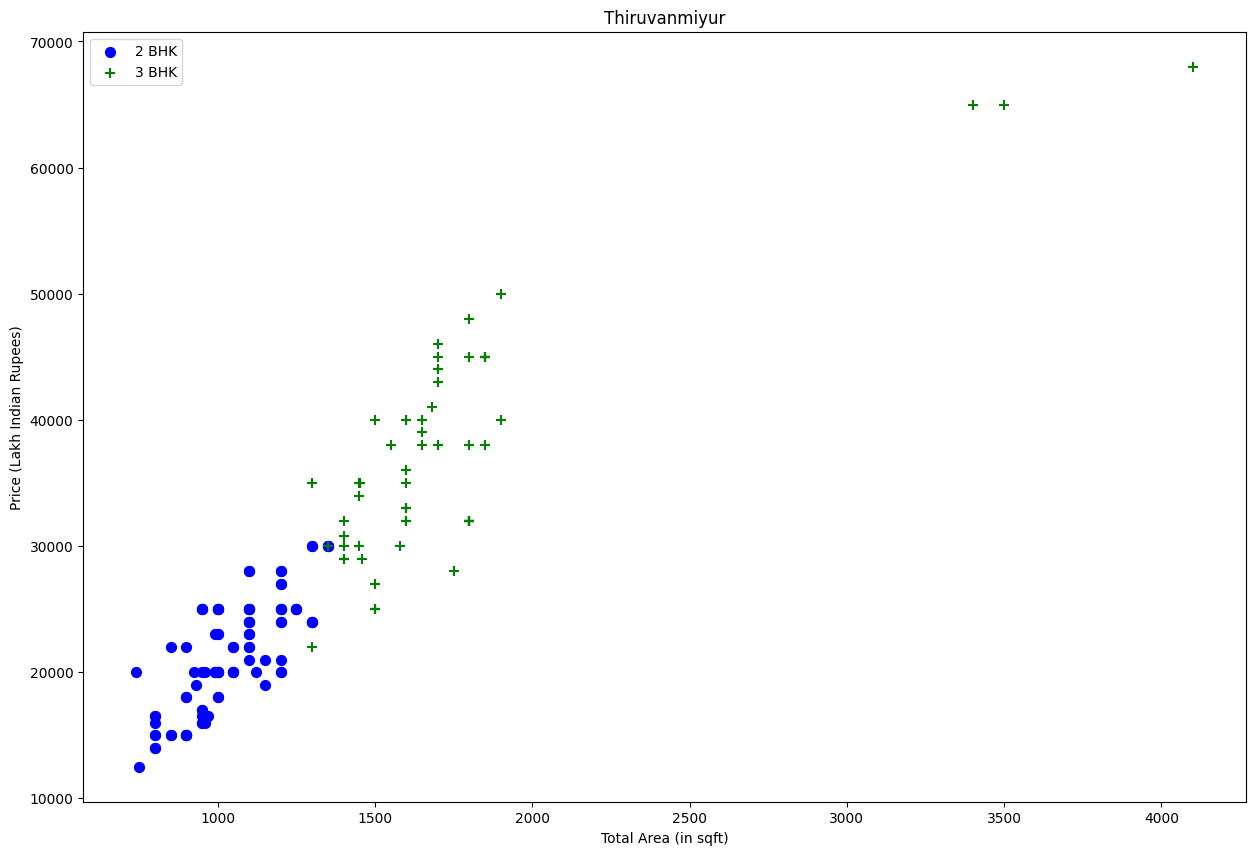

In [34]:
def plot_scatter_chart(df,locality):
    bhk2 = df[(df.locality==locality) & (df.bedroom==2)]
    bhk3 = df[(df.locality==locality) & (df.bedroom==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.area,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.area,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Area (in sqft)")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(locality)
    plt.legend()
    
plot_scatter_chart(df7,"Thiruvanmiyur")

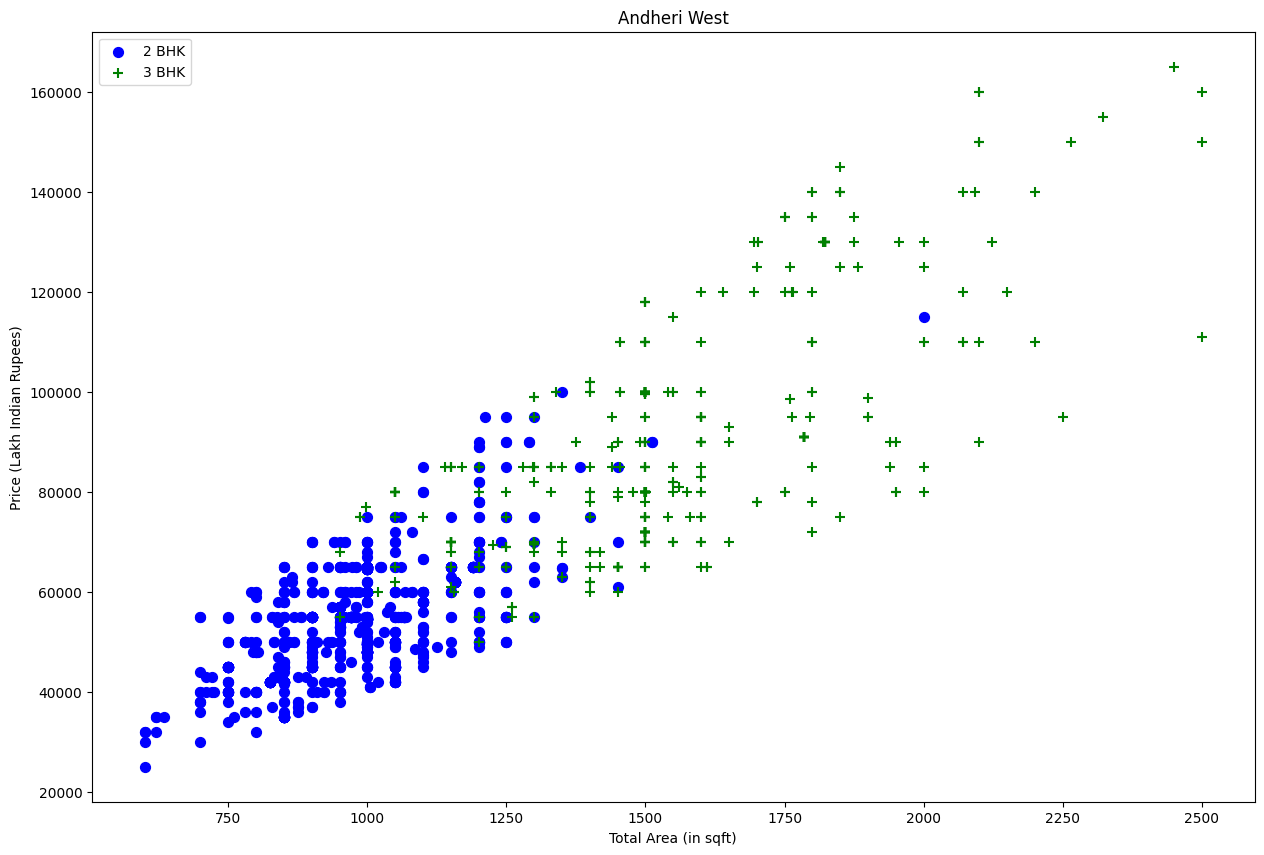

In [35]:
plot_scatter_chart(df7,"Andheri West")

In [36]:
#Remove properties where for the same locality, the rent price is higher than the
#rent price of a property which has one more bedroom, considering it to be outliers

#Remove 2BHK property which have price_per_sqft is less than mean price_per_sqft of 1BHK property

def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('locality'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bedroom'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bedroom'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(92847, 7)

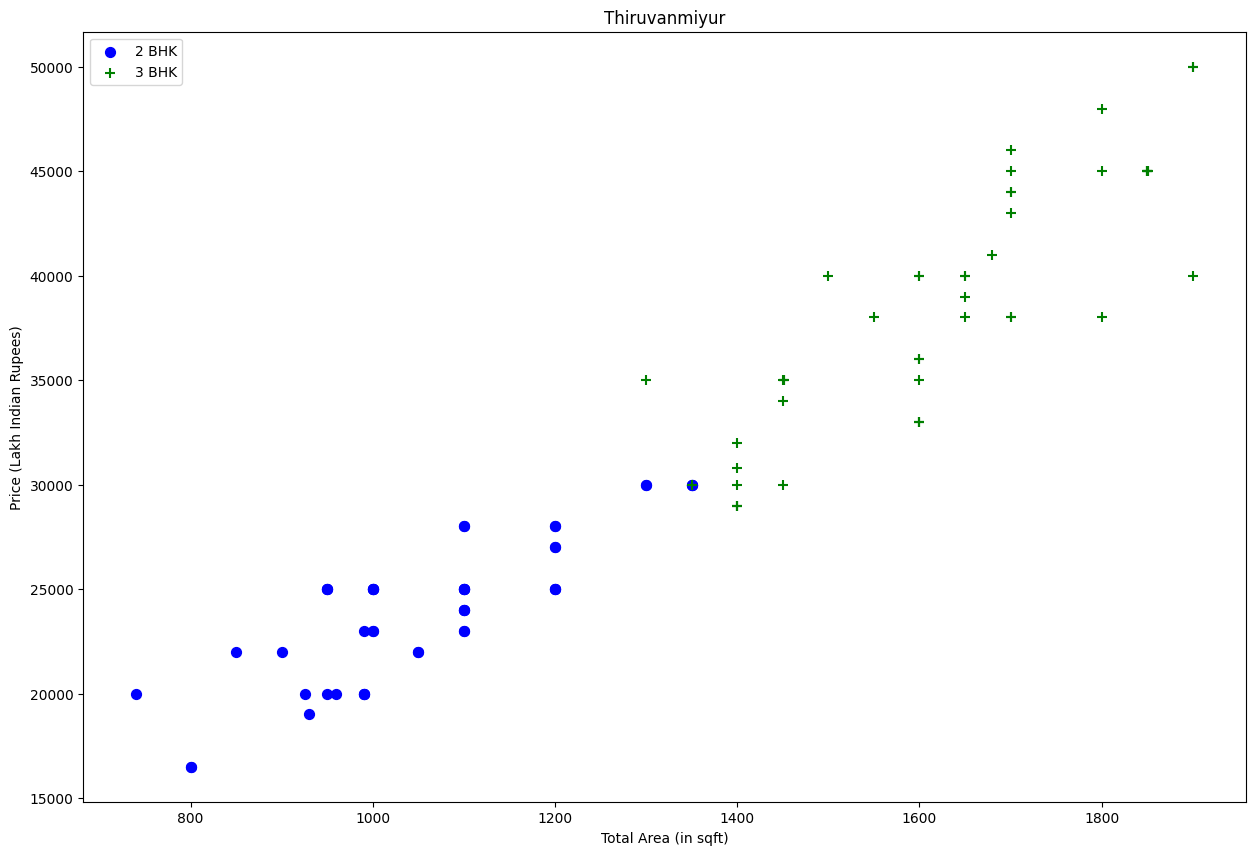

In [37]:
plot_scatter_chart(df8,"Thiruvanmiyur")

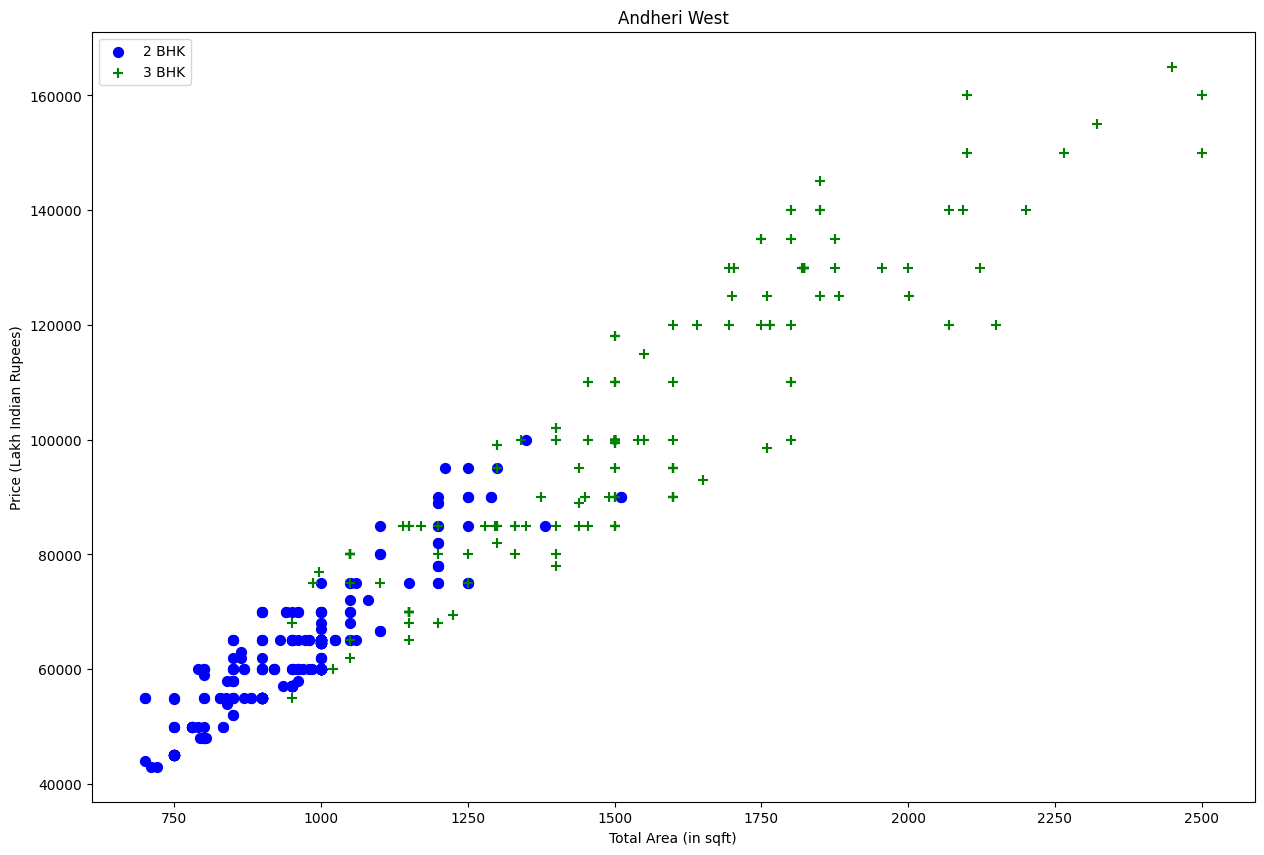

In [38]:
plot_scatter_chart(df8,"Andheri West")

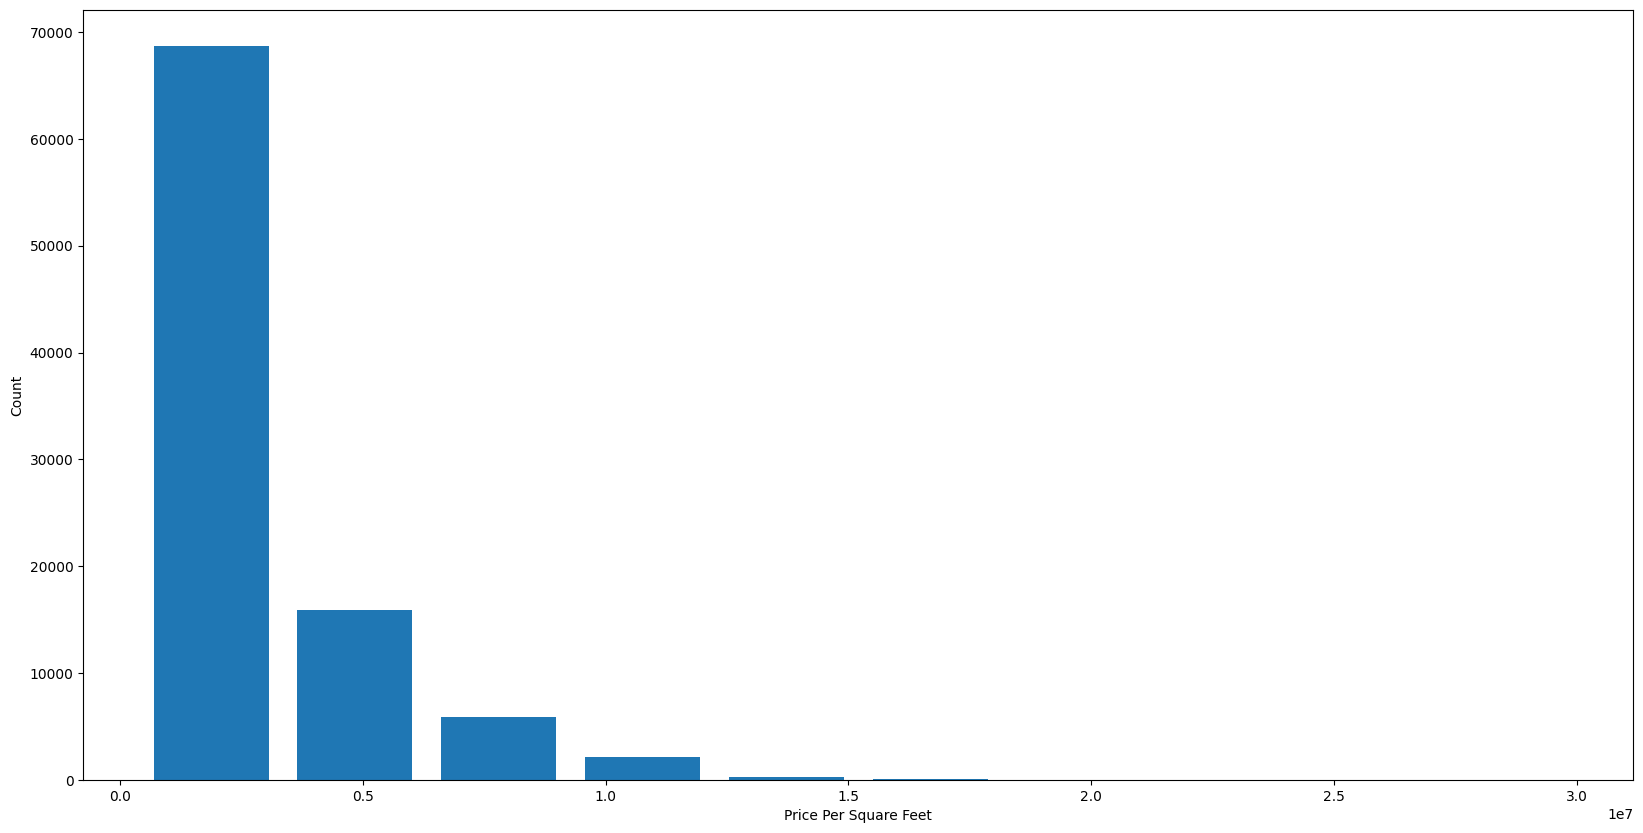

In [39]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")
plt.show()

# Remove outliers based on the number of bathrooms

In [40]:
df8.bathroom.unique()

array([ 1.,  2.,  3.,  6.,  5.,  4.,  7., 10.,  8.,  9., 14., 16., 15.,
       12.])

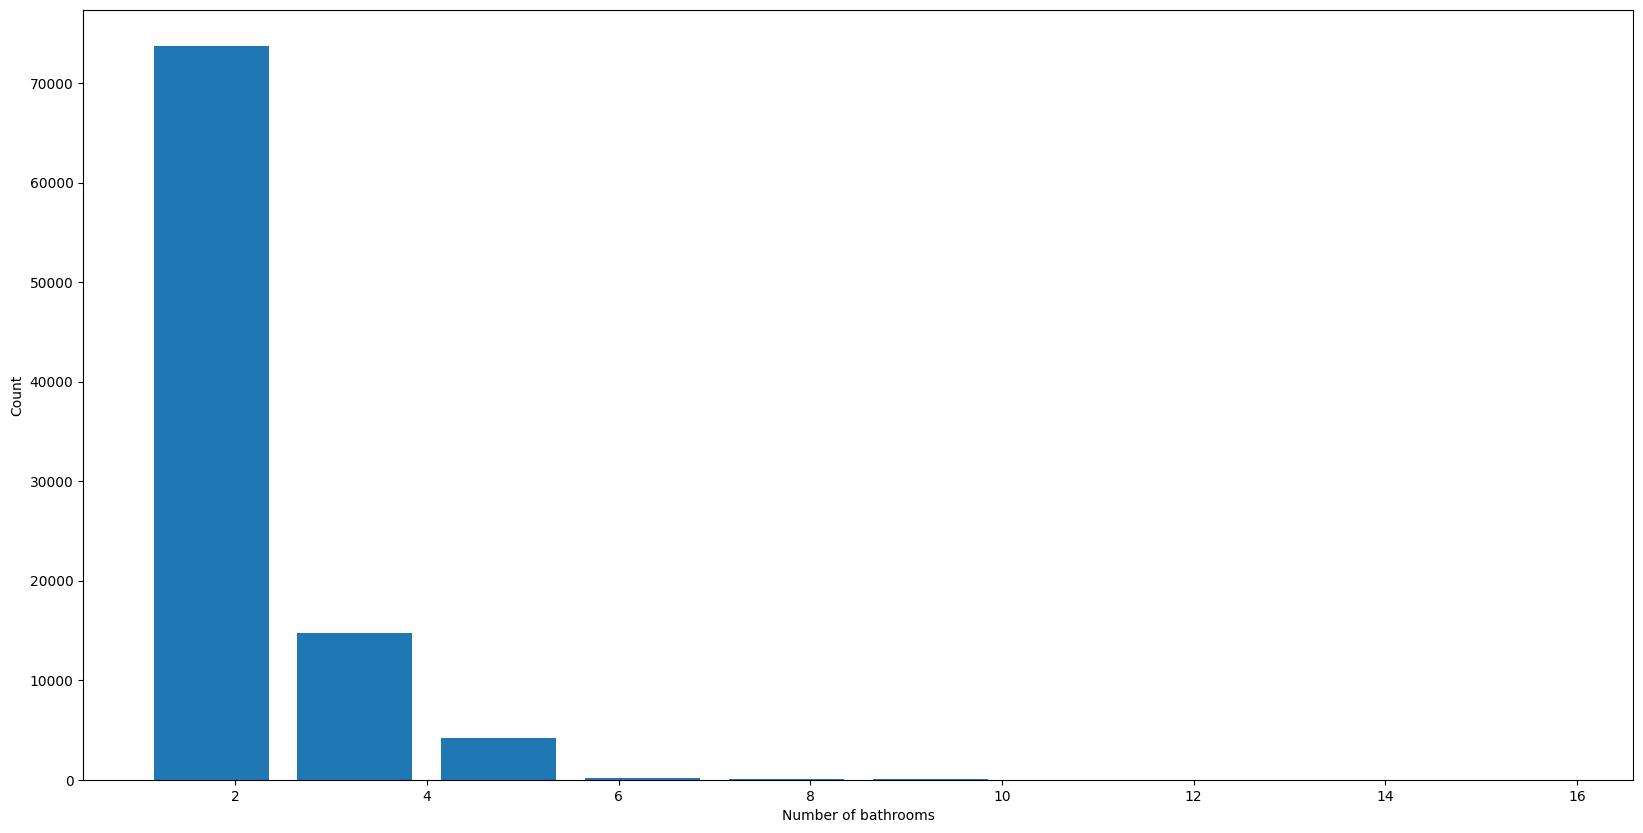

In [41]:
plt.hist(df8.bathroom,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")
plt.show()

In [42]:
df8[df8.bathroom>10]

,bedroom,locality,price,area,bathroom,city,price_per_sqft
46109,15.0,Hauz Khas,1011000.0,12221.0,14.0,Delhi,8.272645e+06
46111,15.0,Hauz Khas,1011000.0,12221.0,14.0,Delhi,8.272645e+06
87940,15.0,New Friends Colony,1118000.0,15461.0,16.0,Delhi,7.231098e+06
87950,15.0,New Friends Colony,1118000.0,15461.0,16.0,Delhi,7.231098e+06
90150,15.0,Niti Bagh,1191000.0,14122.0,16.0,Delhi,8.433650e+06
91769,15.0,Panchsheel Enclave,818000.0,12921.0,15.0,Delhi,6.330779e+06
91772,15.0,Panchsheel Enclave,818000.0,12921.0,15.0,Delhi,6.330779e+06
91957,10.0,Panchsheel Park,1255000.0,12552.0,12.0,Delhi,9.998407e+06
127317,14.0,Vasant Vihar,1741000.0,18541.0,14.0,Delhi,9.390001e+06
127330,14.0,Vasant Vihar,1741000.0,18541.0,14.0,Delhi,9.390001e+06


In [43]:
#Removing data entries which have number of bathrooms greater than two more than the number of bedrooms
#As it is unusual to have such a property in reality

df8[df8.bathroom>df8.bedroom+2]

,bedroom,locality,price,area,bathroom,city,price_per_sqft
3513,1.0,Andheri East,20000.0,400.0,4.0,Mumbai,5.000000e+06
5300,1.0,Andheri East,20000.0,400.0,4.0,Mumbai,5.000000e+06
10267,2.0,Bandlaguda Jagir,12000.0,1060.0,5.0,Hyderabad,1.132075e+06
17738,5.0,Bodakdev,130000.0,5436.0,8.0,Ahmedabad,2.391464e+06
27125,3.0,Chetpet,40000.0,1654.0,6.0,Chennai,2.418380e+06
27126,3.0,Chetpet,40000.0,1654.0,6.0,Chennai,2.418380e+06
42184,3.0,Greater kailash 1,80000.0,1872.0,6.0,Delhi,4.273504e+06
47491,3.0,Hinjewadi,26000.0,1250.0,6.0,Pune,2.080000e+06
47837,4.0,Hitech City,120000.0,4761.0,7.0,Hyderabad,2.520479e+06
52183,4.0,Juhu,400000.0,3500.0,7.0,Mumbai,1.142857e+07


In [44]:
df9 = df8[df8.bathroom<df8.bedroom+2]
df9.shape

(92556, 7)

In [45]:
df9.sample(n=5)

,bedroom,locality,price,area,bathroom,city,price_per_sqft
11123,2.0,Bandra West,95000.0,800.0,2.0,Mumbai,1.187500e+07
36651,1.0,Ghansoli,9700.0,500.0,2.0,Mumbai,1.940000e+06
84161,2.0,Naranpuraa,20000.0,1280.0,2.0,Ahmedabad,1.562500e+06
35696,1.0,Gautam Nagar,11000.0,450.0,1.0,Delhi,2.444444e+06
72290,2.0,Lower Parel,120000.0,1250.0,2.0,Mumbai,9.600000e+06


In [116]:
df10 = df9.drop(['city','price_per_sqft'],axis='columns')
df10.sample(n=5)

,bedroom,locality,price,area,bathroom
641,1.0,Airoli,16000.0,700.0,2.0
58399,3.0,Kandivali West,65000.0,1570.0,3.0
91936,4.0,Panchsheel Park,546000.0,5562.0,4.0
112503,2.0,Shahdara,13000.0,700.0,2.0
60113,1.0,Kasarwadi,11000.0,600.0,1.0


# One Hot Encoding on Locality

In [117]:
dummies = pd.get_dummies(df10.locality)
dummies.head(3)

,25th B Main Rd,5th Phase,AS Rao Nagar,Abbigere,Abids,Abul Fazal Enclave Jamia Nagar,Adambakam,Adarsh Nagar,Additional M.I.D.C,Adikmet,...,raidurgam,rohini sector 5,sahakara nagar,salt lake sec iii,south dum dum,tambaram west,thakur village kandivali east,vikaspuri,vile parle west,worli sea Fase
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,bedroom,locality,price,area,bathroom,25th B Main Rd,5th Phase,AS Rao Nagar,Abbigere,Abids,...,raidurgam,rohini sector 5,sahakara nagar,salt lake sec iii,south dum dum,tambaram west,thakur village kandivali east,vikaspuri,vile parle west,worli sea Fase
0,1.0,25th B Main Rd,18500.0,400.0,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,25th B Main Rd,28500.0,600.0,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,25th B Main Rd,19500.0,400.0,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,25th B Main Rd,18500.0,400.0,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,25th B Main Rd,18500.0,400.0,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
df12 = df11.drop('locality',axis='columns')
df12.head(5)

,bedroom,price,area,bathroom,25th B Main Rd,5th Phase,AS Rao Nagar,Abbigere,Abids,Abul Fazal Enclave Jamia Nagar,...,raidurgam,rohini sector 5,sahakara nagar,salt lake sec iii,south dum dum,tambaram west,thakur village kandivali east,vikaspuri,vile parle west,worli sea Fase
0,1.0,18500.0,400.0,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,28500.0,600.0,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,19500.0,400.0,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,18500.0,400.0,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,18500.0,400.0,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model Building

In [122]:
df12.shape

(92556, 1232)

In [123]:
#df12.to_csv('my_dataset.csv', encoding='utf-8')

In [124]:
X = df12.drop(['price'],axis='columns')
X.head(3)

,bedroom,area,bathroom,25th B Main Rd,5th Phase,AS Rao Nagar,Abbigere,Abids,Abul Fazal Enclave Jamia Nagar,Adambakam,...,raidurgam,rohini sector 5,sahakara nagar,salt lake sec iii,south dum dum,tambaram west,thakur village kandivali east,vikaspuri,vile parle west,worli sea Fase
0,1.0,400.0,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,600.0,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,400.0,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
X.shape

(92556, 1231)

In [126]:
y = df12['price']
y.head(3)

0    18500.0
1    28500.0
2    19500.0
Name: price, dtype: float64

In [127]:
len(y)

92556

In [128]:
#Create a model with 20% of the data as the testing dataset

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.2, random_state=100)
scalar=StandardScaler()
scalar.fit(X_train)

StandardScaler()

In [129]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9008776589397397

In [130]:
#Calculating accuracy scores for five iterartisons

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.89055876, 0.90222733, 0.89579014, 0.89890804, 0.90517203])

In [131]:
#On the above 5 iterations on every occasion the accuracy is more than 89%

In [145]:
#A function to predict the price by passing the locality, area, no.of bedrooms
#and no.of bathrooms as the parameters

import math
def predict_price(locality, area, bathroom, bedroom):    
    loc_index = np.where(X.columns==locality)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = area
    x[1] = bathroom
    x[2] = bedroom
    if loc_index >= 0:
        x[loc_index] = 1
        
    return (lr_clf.predict([x])[0])

In [147]:
predict_price('worli sea Fase', 1500, 2, 2)

-11518468.668898607

# Export the model to a pickle file

# Use K Fold cross validation to measure accuracy of the LinearRegression model

In [73]:
import pickle
with open('rent_predict.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [74]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))